In [147]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm


def sigmoid(x):
    "Numerically stable sigmoid function."
    return 1/(1 + np.exp(-x))*(x >= 0) + np.exp(x)/(1+np.exp(x))*(x < 0)

def nll(X, y, a, b):
    return sum([-yi*np.log(sigmoid(a + b*xi)) - (1-yi)*np.log(1 - sigmoid(a + b*xi)) for (xi, yi) in zip(X, y)])

In [91]:
# X0 = np.array([-0.20,  0.30,  0.20,  1.24, -0.52, 1.44, -1.93,  2.03])
# X1 = np.array([3.77, 4.03, 2.60, 5.69, 1.09, 2.47 , 1.85, 3.27])
X0 = np.array([-0.20,  0.30,  0.20,  1.24, -0.52, 1.44, -1.93, 1.09])
X1 = np.array([3.77, 4.03, 2.60, 5.69, 2.47 , 1.85, 3.27, 2.03])
X = np.concatenate([X0, X1])
y = np.concatenate([np.zeros_like(X0), np.ones_like(X1)])

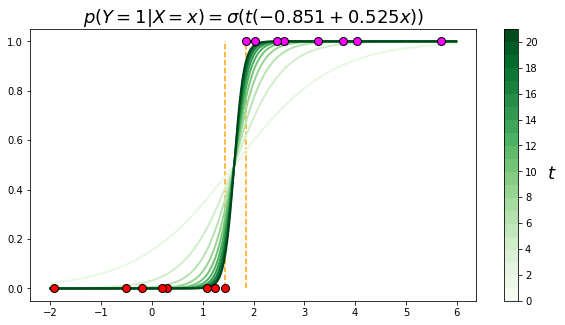

In [212]:
x = np.arange(-2, 6, 0.01)
cmap = cm.get_cmap("Greens")
plt.figure(figsize=(10, 5))
plt.title("$p(Y=1|X=x)=\sigma(t(-0.851 + 0.525x))$", fontsize=18)
plt.plot([1.44, 1.44], [0, 1], color='orange', linestyle='--')
plt.plot([1.85, 1.85], [0, 1], color='orange', linestyle='--')
for i in range(2, 22, 2):
    plt.plot(x, sigmoid(i*(v0 + v1*x)), color=cmap(i/20), linewidth=2)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
plt.colorbar(sm, ticks=range(0, 22, 2), boundaries=range(0,22,1), label="$t$").set_label("    $t$", rotation="horizontal", fontsize=18)
plt.plot(X0, np.zeros_like(X0), 'ro', markeredgecolor='k', markersize=8)
plt.plot(X1, np.ones_like(X1), 'o', color='magenta', markeredgecolor='k', markersize=8)
plt.show()

In [245]:
thetas = np.arange(0, 2*np.pi, 0.001)
ws0 = np.array([np.ones_like(X0), X0])
ws1 = np.array([np.ones_like(X1), X1])
vs = np.array([np.cos(thetas), np.sin(thetas)]).T

np.nonzero(np.prod(vs.dot(ws1) < 0, axis=1)*np.prod(vs.dot(ws0) > 0, axis=1))
print(thetas[5677], thetas[5787]) # 5.677, 5.787

5.6770000000000005 5.787


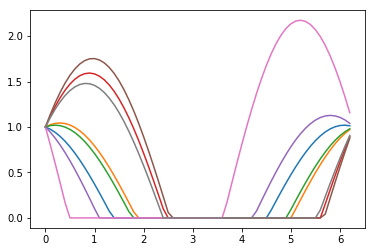

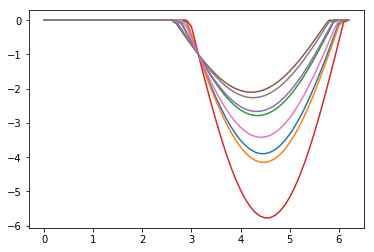

In [234]:
for v in vs.dot(ws0).T:
    plt.plot(thetas, np.maximum(0, v))
plt.show()

for v in vs.dot(ws1).T:
    plt.plot(thetas, np.minimum(0, v))
plt.show()
# np.prod((vs.dot(ws1) < 0), axis=1)
# [v0, v1] = -vs[573]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


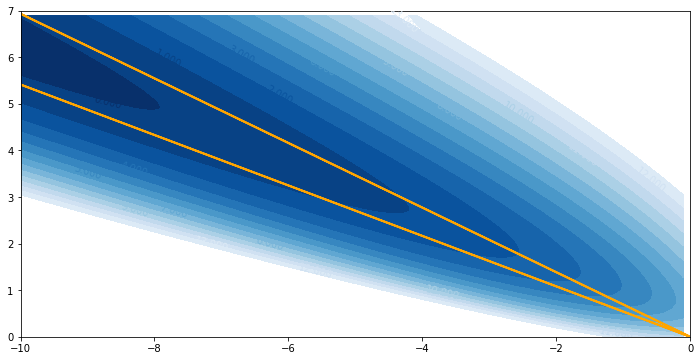

In [285]:
a, b = np.meshgrid(np.arange(-10, 0, 0.1), np.arange(0, 7, 0.1))
z = nll(X, y, a, b)
plt.figure(figsize=(12, 6))
plt.xlim(-10, 0)
plt.ylim(0, 7)
cs = plt.contourf(a, b, z, levels=range(15), colors=[cm.get_cmap("Blues")(1 - n/15) for n in range(15)])
plt.clabel(cs, inline=1, fontsize=10)
plt.arrow(0, 0, *(-20*vs[5677]), linewidth=2, color="orange")
plt.arrow(0, 0, *(-20*vs[5787]), linewidth=2, color="orange")
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


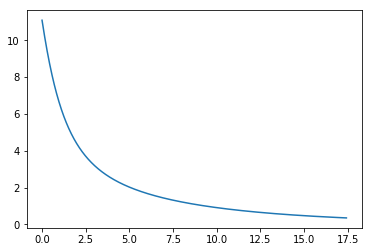

In [236]:
t = np.arange(0, 18, 0.01)
a = -0.85*t
b = 0.52*t
n = nll(X, y, a, b)
plt.plot(t, n)
plt.show()

In [237]:
np.nonzero(np.prod(vs.dot(ws1) < 0, axis=1)*np.prod(vs.dot(ws0) > 0, axis=1))

(array([57]),)

In [229]:
np.prod(vs.dot(ws0) > 0, axis=1)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [150]:
[x for x in range(10, 100,20)]

[10, 30, 50, 70, 90]

In [233]:
thetas[57]

5.7

In [184]:
v0

-0.8508552805611925

In [253]:
-5*vs[5677]

array([-4.10913681,  2.84868297])

In [ ]:
thetas